In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [51]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.drop(["sepal length (cm)", "sepal width (cm)"], axis="columns")
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [52]:
x = df[['petal length (cm)']]
y = df[['petal width (cm)']]

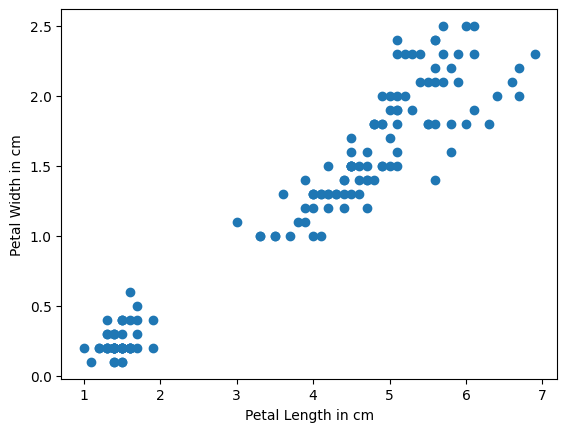

In [53]:
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.scatter(x, y)

In [59]:
scaler = MinMaxScaler()
scaler.fit(df[["petal length (cm)"]])
df["petal length (cm)"] = scaler.transform(df[["petal length (cm)"]])
scaler.fit(df[["petal width (cm)"]])
df["petal width (cm)"] = scaler.transform(df[["petal width (cm)"]])
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [60]:
model = KMeans(n_clusters=2)
y_predicted = model.fit_predict(X = df[['petal length (cm)', 'petal width (cm)']])

In [61]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


Text(0, 0.5, 'Petal Width in cm')

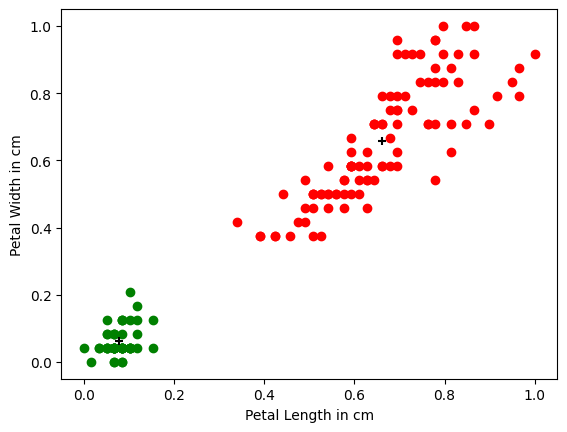

In [62]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="red")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="green")
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="+", color="black")
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')

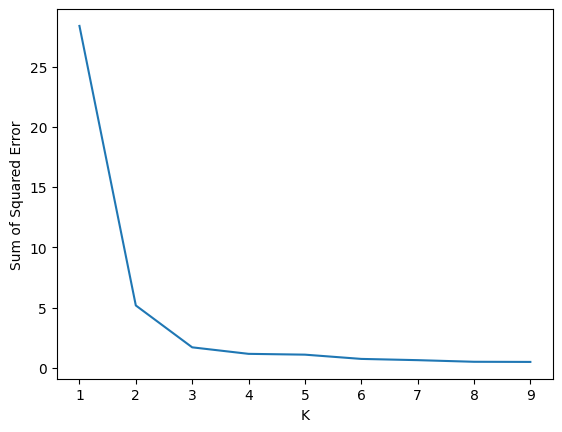

In [63]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)", "petal width (cm)"]])
    sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_range, sse)